<a href="https://colab.research.google.com/github/Himan2580/Himanshu-Sharma/blob/master/Autoinsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded=files.upload()

Saving Customerlifevalue.csv to Customerlifevalue (1).csv


In [0]:
import numpy as np
import pandas as pd

In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded["Customerlifevalue.csv"]))

In [0]:
df2.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [0]:
df2.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [0]:
df2.shape

(9134, 24)

In [0]:
checkdtype = df2.get_dtype_counts()
checkdtype

float64     2
int64       6
object     16
dtype: int64

In [0]:
df2["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [0]:
import seaborn as sns

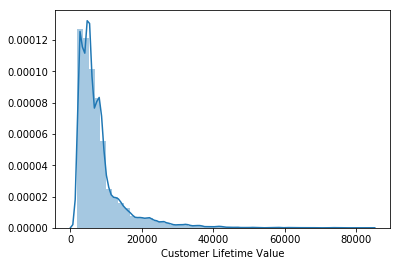

In [0]:
sns.distplot(df2["Customer Lifetime Value"])

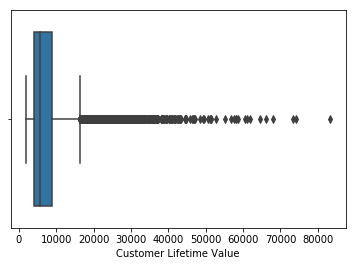

In [0]:
sns.boxplot(df2["Customer Lifetime Value"])

In [0]:
from scipy import stats
z = np.abs(stats.zscore(df2["Customer Lifetime Value"]))
print(z)

[0.76287773 0.14924546 0.71063622 ... 0.02313483 0.06993547 0.78495478]


In [0]:
Threshold = 15000
print(np.where(z>15000))

(array([], dtype=int64),)


In [0]:
from scipy.stats import skew
x = np.random.normal(df2["Customer Lifetime Value"])
print("X : \n",x)
print("Skewness of the data is :", skew(x))

X : 
 [ 2762.28166476  6979.46248182 12887.60274021 ...  8164.63875427
  7523.80641582  2612.28973365]
Skewness of the data is : 3.031768997206876


Skewness is : 0.5759407149025203


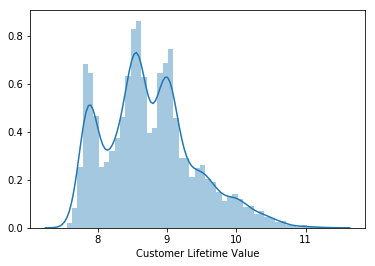

In [0]:
target = np.log(df2["Customer Lifetime Value"])
print("Skewness is :",target.skew())
sns.distplot(target)

In [0]:
numeric_data = df2.select_dtypes(include=[np.number])
cat_data = df2.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 8 numeric and 16 categorical columns in train data


In [0]:
del cat_data["Customer"]

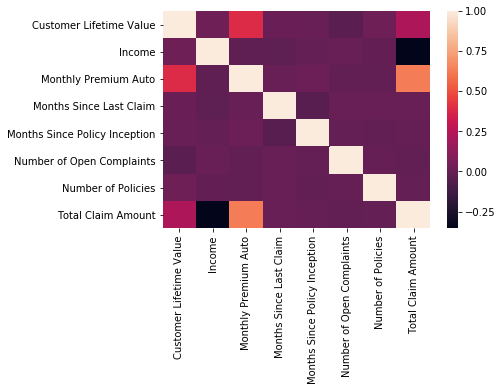

In [0]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [0]:
print(corr["Customer Lifetime Value"].sort_values(ascending=False)[:15], "\n")
print("----------------------------------")
print (corr['Customer Lifetime Value'].sort_values(ascending=False)[-5:])

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64 

----------------------------------
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64


In [0]:
cat_data.describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [0]:
sp_pivot = df2.pivot_table(index = "Vehicle Size", values = "Customer Lifetime Value", aggfunc = np.median)
sp_pivot

,Customer Lifetime Value
Vehicle Size,
Large,5483.068552
Medsize,5844.520484
Small,5757.442258


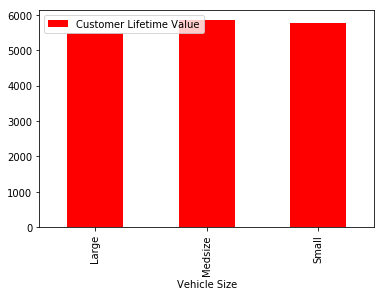

In [0]:
sp_pivot.plot(kind = "bar",color = "red")

In [0]:
cat = [f for f in df2.columns if df2.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Customer Lifetime Value'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['Customer Lifetime Value'] = df2.Customer Lifetime Value.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

SyntaxError: ignored

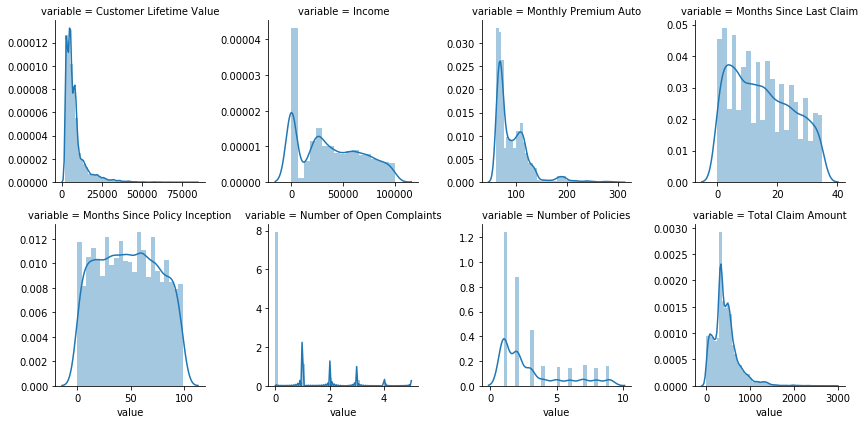

In [0]:
#create numeric plots
num = [f for f in df2.columns if df2.dtypes[f] != 'object']
nd = pd.melt(df2, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

NameError: ignored